<a href="https://colab.research.google.com/github/alyawdi/AI_Project/blob/main/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  # Alias for ID3 (information gain)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("sample_data/cardio.csv")
df.info()
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]>

In [3]:
df =df.drop("id", axis=1)
new_file_name = "cardio_without_id.csv"

df.to_csv(new_file_name, index=False)

print(f"Data saved successfully to: {new_file_name}")
df

Data saved successfully to: cardio_without_id.csv


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


this function down is to remove the age by days column and replace it by age by year

In [4]:

def convert_age_to_years(data):


  if 'age' not in data.columns:
      print("Warning: 'age' column not found in the DataFrame.")
      return data

  data['age_in_years'] = data['age'] / 365

  data.drop('age', axis=1, inplace=True)

  return data

df = convert_age_to_years(df.copy())
# print(data_with_years)


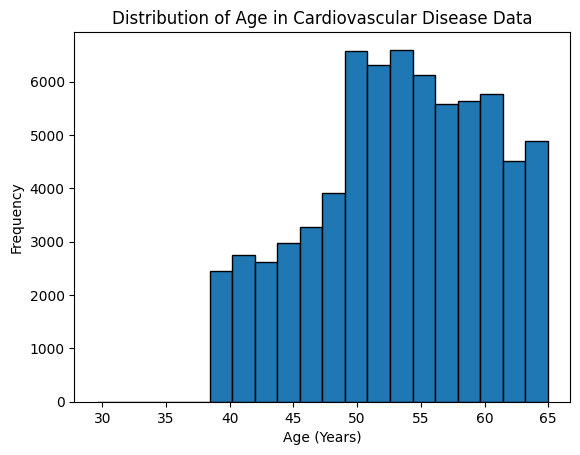

In [5]:
plt.hist(df["age_in_years"], bins=20, edgecolor="black")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Age in Cardiovascular Disease Data")
plt.show()

#in this line we created a new row which is age in years


this function was used to see the features for those who're less than 50 kg

# def plot_underweight_data(data_path, weight_column="weight"):


#   # Load data from CSV file
#   data = pd.read_csv(data_path)

#   # Filter data for individuals with weight less than 50
#   underweight_data = data[data[weight_column] < 50]

#   # Check if any data points meet the criteria
#   if underweight_data.empty:
#     print("No data points found for individuals weighing less than 50.")
#     return

#   # Explore the data (optional)
#   # You can add code here to explore other features of the underweight data (e.g., using describe())

#   # Plot the data (replace with your desired plot type)
#   # Here, we're plotting all numerical features vs index
#   for feature in underweight_data.select_dtypes(include=[np.number]):
#     plt.plot(underweight_data.index, underweight_data[feature])
#     plt.xlabel("Index")
#     plt.ylabel(feature)
#     plt.title(f"Features of Individuals Weighing Less Than 50 ({feature})")
#     plt.show()

# # Example usage (replace "cardio.csv" with your actual file path)
# plot_underweight_data("Patient's Sickness Prediction/cardio.csv","weight")

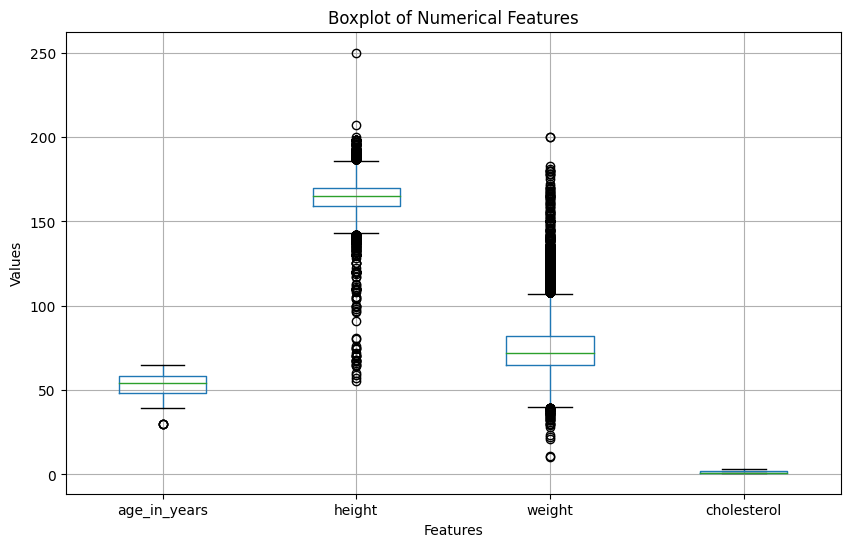

In [6]:
df.isnull().sum();

numerical_features = ['age_in_years', 'height', 'weight', 'cholesterol']

df[numerical_features].boxplot(figsize=(10, 6))

plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


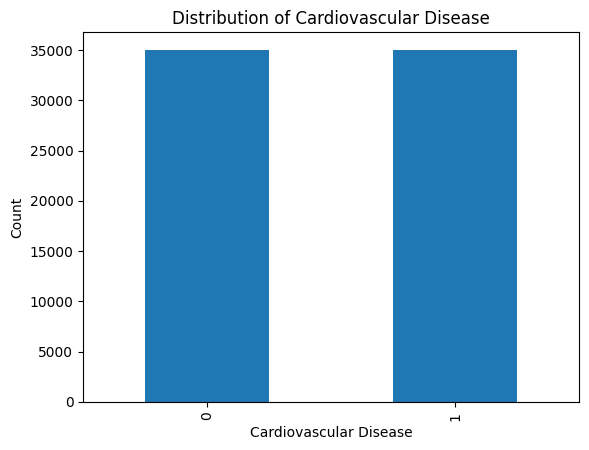

In [7]:
#here we checked if the data is balanced or not by seeing the distribution of the target variable
df["cardio"].value_counts().plot(kind="bar")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.title("Distribution of Cardiovascular Disease")
plt.show()

In [8]:
# Check for negative age or extreme values in height/weight
print(f"Minimum Age: {(df['age_in_years'].max())}") # we divide by 365 to get age in years
print(f"minimum Height: {df['height'].max()}")
print(f"Minimum Weight: {df['weight'].min()}")

# # Explore Blood Pressure ranges (you can adjust these based on your research)
# print(f"Blood Pressure (systolic) - Possible outliers below: {df[df['ap_hi'] < 80]}")
# print(f"Blood Pressure (systolic) - Possible outliers above: {df[df['ap_hi'] > 220]}")


Minimum Age: 64.96712328767123
minimum Height: 250
Minimum Weight: 10.0


we caught an important imbalance according to the relation between the weight, height, age...

so what are we going to do is that we're going to measure the bmi of every person and see if it is less than 10 it is probably in most cases impossible and he/she should be dead
from that point according to the amount of those who have a bmi less than 10 we're going to decide what todo in the data

In [10]:

def calculate_bmi_and_count_underweight(data, weight_column="weight", height_column="height"):


  # Check if weight and height columns exist
  if weight_column not in data.columns or height_column not in data.columns:
    raise ValueError(f"Columns '{weight_column}' and '{height_column}' not found in data.")

  # Calculate BMI (assuming height is in meters)
  df["BMI"] = df[weight_column] / ((df[height_column] /100) **2)

#this edit in the method was to change between counting them and displaying their data
  # # Count the number of underweight individuals (BMI < 10)
  # count_underweight = df[df["BMI"] < 13].shape[0]

  # return count_underweight, df


  # Count the number of underweight individuals (BMI < 10)
  underweight_data = df[df["BMI"] < 10]

  # Return data of underweight individuals
  return underweight_data
# Example usage (assuming your data is in a DataFrame named 'cardio_data')
count_underweight = calculate_bmi_and_count_underweight(df, weight_column="weight", height_column="height")

print(f"Number of people with BMI less than 10: {count_underweight}")
# The data_with_bmi DataFrame now includes a new 'BMI' column


Number of people with BMI less than 10:        gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
26806       1     157    23.0    110     80            1     1      0     0   
29488       2     177    22.0    120     80            1     1      1     1   
33817       2     178    11.0    130     90            1     1      0     0   
57858       2     165    10.0    180   1100            2     2      0     0   
60188       1     162    21.0    120     80            2     1      0     0   
60699       1     171    29.0    110     70            2     1      0     0   

       active  cardio  age_in_years       BMI  
26806       1       0     63.791781  9.331007  
29488       1       0     55.912329  7.022248  
33817       1       1     59.128767  3.471784  
57858       1       1     51.517808  3.673095  
60188       1       1     59.876712  8.001829  
60699       1       1     51.712329  9.917581  


As we can see the number of data rows who are mostly wrong is 13 in relative to 70000 the removing of those 13 will make no problem at all

In [11]:
def drop_underweight_rows(dataframe, bmi_column="BMI"):
    # Drop rows with BMI less than 10
    dataframe.drop(dataframe[dataframe[bmi_column] < 10].index, inplace=True)

    return dataframe
drop_underweight_rows(df, bmi_column="BMI")
df.drop('BMI', axis=1, inplace=True)

In [12]:

def find_blood_pressure_outliers(data, sbp_column="SystolicBP", dbp_column="DiastolicBP",
                                 low_thresh_sbp=80, high_thresh_sbp=200,
                                 low_thresh_dbp=60, high_thresh_dbp=200):

  # Filter for outlier values (outside thresholds) in either SBP or DBP
  outliers = data[((data[sbp_column] < low_thresh_sbp) | (data[sbp_column] > high_thresh_sbp)) |
                ((data[dbp_column] < low_thresh_dbp) | (data[dbp_column] > high_thresh_dbp))]

  return outliers

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
blood_pressure_outliers = find_blood_pressure_outliers(df, sbp_column="ap_hi", dbp_column="ap_lo")

if blood_pressure_outliers.empty:
  print("No blood pressure outliers found in the dataset.")
else:
  print("Following rows contain outlier blood pressure values:")
  print(blood_pressure_outliers)


Following rows contain outlier blood pressure values:
       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
228         2     183    98.0    160   1100            1     2      1     0   
241         2     157    60.0    160   1000            2     1      0     0   
260         1     150    83.0    140    800            1     1      0     0   
329         1     176    63.0    160   1000            2     2      0     0   
345         1     154    81.0    140   1000            2     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69771       1     167    81.0    160   1000            1     1      0     0   
69872       1     152    56.0    160   1000            1     1      0     0   
69878       2     168    95.0    160   1000            1     1      0     0   
69885       2     166    78.0    170   1000            1     1      0     0   
69967       2     168    63.0    140   1000            1     1      0     0  

In [13]:
def count_invalid_blood_pressure(data):

  if 'ap_hi' not in data.columns or 'ap_lo' not in data.columns:
    print("Warning: 'ap_hi' or 'ap_lo' columns not found in the DataFrame.")
    return 0

  # Count rows where ap_lo > ap_hi
  invalid_count = (data['ap_lo'] > data['ap_hi']).sum()

  return invalid_count

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
invalid_count = count_invalid_blood_pressure(df.copy())

print("Number of rows with ap_hi lower than ap_lo:", invalid_count)


Number of rows with ap_hi lower than ap_lo: 1233


In [14]:
def drop_invalid_bp(data):

  # Filter rows where ap_hi is greater than or equal to ap_lo
  data.drop(data[data['ap_hi'] <= data['ap_lo']].index, inplace=True)

drop_invalid_bp(df)



in the above code we dropped the rows where sbp is lower or equal to dbp

In [15]:
correlation_matrix = df.corr()

# Print the correlation matrix (optional)
print(correlation_matrix)

                gender    height    weight     ap_hi     ap_lo  cholesterol  \
gender        1.000000  0.498290  0.155995  0.005878  0.065718    -0.036864   
height        0.498290  1.000000  0.291701  0.005667  0.036486    -0.050645   
weight        0.155995  0.291701  1.000000  0.029671  0.249132     0.141079   
ap_hi         0.005878  0.005667  0.029671  1.000000  0.076093     0.022840   
ap_lo         0.065718  0.036486  0.249132  0.076093  1.000000     0.157648   
cholesterol  -0.036864 -0.050645  0.141079  0.022840  0.157648     1.000000   
gluc         -0.021182 -0.018535  0.106980  0.011632  0.074593     0.450385   
smoke         0.338682  0.188063  0.067212 -0.001341  0.025658     0.009889   
alco          0.171096  0.094405  0.067594  0.001467  0.036920     0.035064   
active        0.006025 -0.007357 -0.017689 -0.000485 -0.001723     0.008757   
cardio        0.007122 -0.010459  0.179899  0.053192  0.332515     0.221456   
age_in_years -0.023111 -0.080988  0.055150  0.020345

we applied here correlation analysis to see if there is any relation between SBP and DBP and other features to see if we can apply knn to fix the wrong values in these two column but and most values were two low; so they don't have any correlation and from that point applying KNN will be missleading

The best thing todo here is to remove those values because they're also around 1000 in a 700000 dataset which will not cause that affect

In [16]:

def clean_blood_pressure_column(data, column_name, low_thresh, high_thresh, inplace= False):

  # Filter for invalid values (negative, zero, or outside thresholds)
  invalid_values = (data[column_name] < low_thresh) | (data[column_name] == 0) | (data[column_name] > high_thresh)

  if inplace:
    # Modify the original DataFrame (inplace)
    data.drop(data[invalid_values].index, inplace=True)
  else:
    # Return a new cleaned DataFrame
    cleaned_data = data.drop(data[invalid_values].index)
    return cleaned_data



df= clean_blood_pressure_column(df, "ap_hi", 10, 300)
df= clean_blood_pressure_column(df, "ap_lo", 10, 300)




After consulting exprets we removed extreme wrong data which are above 300 or less than 10 in both column


In [17]:

def find_blood_pressure_outliers(data, sbp_column="SystolicBP", dbp_column="DiastolicBP",
                                 low_thresh_sbp=10, high_thresh_sbp=300,
                                 low_thresh_dbp=10, high_thresh_dbp=300):

  # Filter for outlier values (outside thresholds) in either SBP or DBP
  outliers = data[((data[sbp_column] < low_thresh_sbp) | (data[sbp_column] > high_thresh_sbp)) |
                ((data[dbp_column] < low_thresh_dbp) | (data[dbp_column] > high_thresh_dbp))| (data[dbp_column] >= data[sbp_column])]

  return outliers

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
blood_pressure_outliers = find_blood_pressure_outliers(df, sbp_column="ap_hi", dbp_column="ap_lo")

if blood_pressure_outliers.empty:
  print("No blood pressure outliers found in the dataset.")
else:
  print("Following rows contain outlier blood pressure values:")
  print(blood_pressure_outliers)


No blood pressure outliers found in the dataset.


In [18]:
import pandas as pd

def get_max_value(data, column_name):


  # Get the maximum value
  max_value = data[column_name].max()
  min_value = data[column_name].min()
  return max_value, min_value

#
print( { get_max_value(df, "active")})
print( {get_max_value(df, "gluc")})
print( { get_max_value(df, "smoke")})
print( { get_max_value(df, "alco")})
print ({get_max_value(df,"cardio")})


{(1, 0)}
{(3, 1)}
{(1, 0)}
{(1, 0)}
{(1, 0)}


now we checked all the columns
No missing values
no wrong values


In [19]:
def has_negative_values(data, column_name):

  # Check for negative values using a boolean Series
  has_negative = data[column_name] <= 0

  # Check if any element in the Series is True (meaning there's at least one negative value)
  return has_negative.any()

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
has_negative_systolic = has_negative_values(df, "ap_lo")
has_negative_diastolic = has_negative_values(df, "ap_hi")

print(f"Systolic Blood Pressure has negative values: {has_negative_systolic}")
print(f"Diastolic Blood Pressure has negative values: {has_negative_diastolic}")


Systolic Blood Pressure has negative values: False
Diastolic Blood Pressure has negative values: False


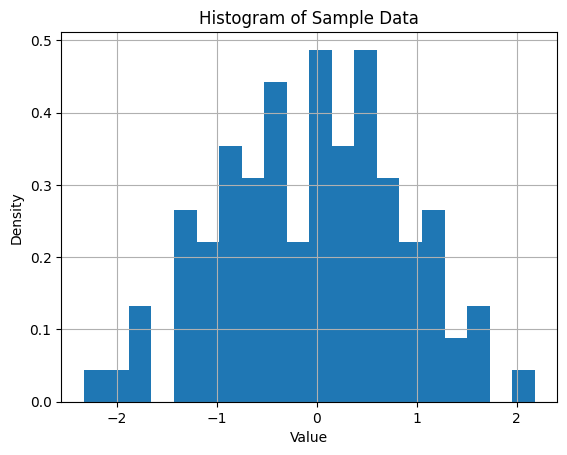

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
data = np.random.normal(size=100)  # Generate some normally distributed data

# Histogram
plt.hist(data, bins=20, density=True)  # Plot the histogram with 20 bins and normalize the area
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Sample Data")
plt.grid(True)
plt.show()


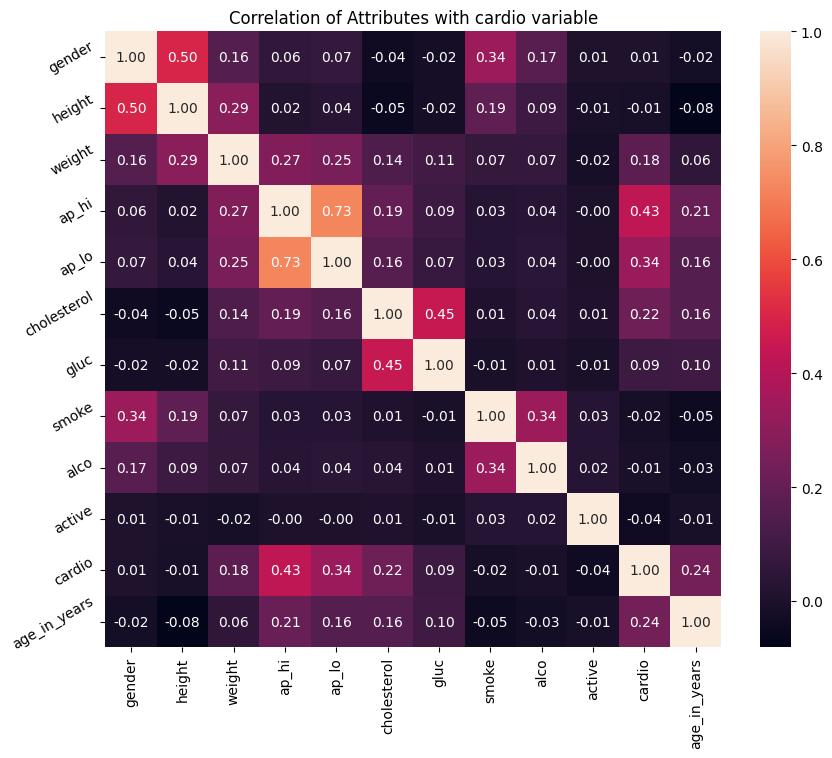

In [29]:
correlation = df.corr()
correlation['cardio'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with cardio variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

now it is time to split the cleaned data into training and testing dataset

In [21]:
X = df.drop("cardio", axis=1)
Y = df["cardio"]
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

here we're going to choose which is the best model that fits our data looking using lazyPredict which will test three models |

In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_normalized = scaler.fit_transform(X_train)

# Normalize the testing data
X_test_normalized = scaler.transform(X_test)


in above we tried to **standardize data**


in the below code we tried to **normalize data**

to compare them and see which one will give us **more accurate results**

In [32]:
from sklearn.preprocessing import MinMaxScaler


# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train (important to learn from training data)
scaler.fit(X_train)

# Transform X_train and X_test using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you have normalized X_train_scaled and X_test_scaled


In [23]:
models = {}


models["CART"] = DecisionTreeClassifier(criterion="gini")
models["CART"].fit(X_train_normalized, y_train)


models["ID3"] = DecisionTreeClassifier(criterion = "entropy")
models["ID3"].fit(X_train_normalized, y_train)

models["C4.5"] = DecisionTreeClassifier(criterion='entropy', splitter='best')
models["C4.5"].fit(X_train_normalized, y_train)



models["KNN"] = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
models["KNN"].fit(X_train_normalized, y_train)


for name, model in models.items():
  y_pred = model.predict(X_test_normalized)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy:.4f}")

CART Accuracy: 0.6351
ID3 Accuracy: 0.6311
C4.5 Accuracy: 0.6305
KNN Accuracy: 0.6924


as the follow the KNN algorithm had the most accuracy score in the data so we're going now to apply normailzation and standardization then elbow method to find the best K for the data

In [25]:
k_values = range(30, 40)  # Adjust the range as needed

# Create an empty dictionary to store k values and accuracies
k_accuracies = {}

# Iterate through each k value
for k in k_values:
  # Create a KNN classifier with the current k
  knn = KNeighborsClassifier(n_neighbors=k)

  # Train the model
  knn.fit(X_train_normalized, y_train)

  # Predict on the testing set
  y_pred = knn.predict(X_test_normalized)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Store the accuracy for this k value in the dictionary
  k_accuracies[k] = accuracy

# Print the k values and their corresponding accuracies
for k, accuracy in k_accuracies.items():
  print(f"k={k}: Accuracy: {accuracy:.4f}")

k=30: Accuracy: 0.7232
k=31: Accuracy: 0.7231
k=32: Accuracy: 0.7231
k=33: Accuracy: 0.7240
k=34: Accuracy: 0.7250
k=35: Accuracy: 0.7251
k=36: Accuracy: 0.7251
k=37: Accuracy: 0.7239
k=38: Accuracy: 0.7245
k=39: Accuracy: 0.7241


In [37]:
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 68696 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        68696 non-null  int64  
 1   height        68696 non-null  int64  
 2   weight        68696 non-null  float64
 3   ap_hi         68696 non-null  int64  
 4   ap_lo         68696 non-null  int64  
 5   cholesterol   68696 non-null  int64  
 6   gluc          68696 non-null  int64  
 7   smoke         68696 non-null  int64  
 8   alco          68696 non-null  int64  
 9   active        68696 non-null  int64  
 10  cardio        68696 non-null  int64  
 11  age_in_years  68696 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 6.8 MB
None
       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=27)

# Train the model
knn.fit(x_train_normalized, y_train)

# Predict on the testing set
y_pred = knn.predict(x_test_normalized)


cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

def calculate_precision_recall(true_positives, false_positives, false_negatives):

  # Handle zero denominator cases (avoid division by zero)
  if true_positives + false_positives == 0:
    precision = 0.0
  else:
    precision = true_positives / float(true_positives + false_positives)

  if true_positives + false_negatives == 0:
    recall = 0.0
  else:
    recall = true_positives / float(true_positives + false_negatives)

  return {"precision": precision, "recall": recall}

metrics = calculate_precision_recall(cm[0,0], cm[0,1], cm[1,0])

f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")


Confusion matrix

 [[5287 1646]
 [2170 4637]]

True Positives(TP) =  5287

True Negatives(TN) =  4637

False Positives(FP) =  1646

False Negatives(FN) =  2170
F1 Score: 0.7084797555385791
Precision: 0.7626
Recall: 0.7090
